In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

<h1>E17 Fourier-Analyse gekoppelter elektrischer Schwingungen</h1>

<h1> Aufgabe 0</h1>

<p>In der Vorbereitung sind die Fourierkoeffizienten fur eine Rechteck- und eine Dreiecksschwingung
analytisch zu berechnen. Fuhren Sie unter Verwendung geeigneter Software (z.B. ORIGIN) eine
Fast-Fourier-Transform (FFT) eines Sinus-, Dreieck- und Rechtecksignals durch. Vergleichen Sie die
Ergebnisse fur das Dreieck- und Rechtecksignal mit den analytischen Ergebnissen.</p>

In [44]:
def getPhaseAngleFFT(t,y):
    n = y.size
    fourier = np.fft.fft(y)

    cfour = 2/n * fourier
    cfour[0] = cfour[0]/2

    freq = np.fft.fftfreq(n, d=np.diff(t)[0])
    mask = freq >= 0
    X_mag = np.abs(cfour)
    X_phase = np.angle(cfour)
    return [freq[mask], X_mag[mask], X_phase[mask]]

In [45]:
def getRealImFFT(t,y):
    n = y.size
    fourier = np.fft.fft(y)

    cfour = 2/n * fourier
    cfour[0] = cfour[0]/2

    freq = np.fft.fftfreq(n, d=np.average(np.diff(t)[0]))
    mask = freq >= 0
    X_real = np.real(cfour)
    X_imag = np.imag(cfour)
    return [freq[mask], X_real[mask], -X_imag[mask]]

In [46]:
def plotPA(freq, X_mag, X_phase, k, xData=None, yData=None):
    fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
    fig.suptitle("Phasen-Amplitude Plot", fontsize=26)
    ax1.plot(freq[0:k], X_mag[0:k], label="FFT")
    if xData is not None:
        ax1.scatter(xData, yData, color="red", label="Calculated")
    ax1.set_xlabel("Frequenz in Hz")
    ax1.set_ylabel("Amplitude in V")
    ax1.legend()
    ax2.plot(freq[0:k], X_phase[0:k])
    ax2.set_xlabel("Phase in Rad")
    ax2.set_ylabel("Amplitude in V")
    plt.show()

In [47]:
def plotRI(freq, X_real, X_imag, k):
    fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
    fig.suptitle("Real-Imaginär Plot", fontsize=26)
    ax1.plot(freq[0:k], X_real[0:k])
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Realteil")
    ax2.plot(freq[0:k], X_imag[0:k])
    ax2.set_xlabel("Frequency")
    ax2.set_ylabel("-Imaginärteil")
    plt.show()

In [48]:
def getMax(amp, count, r=0):
    output= []
    camp = amp.copy()
    for i in range(count):
        max = np.argmax(camp)
        output.append(max)
        for j in range(int(r/2+1)):
            camp[max+j] = 0
            camp[max-j] = 0
    return output

<h3>Sinuskurve</h3>

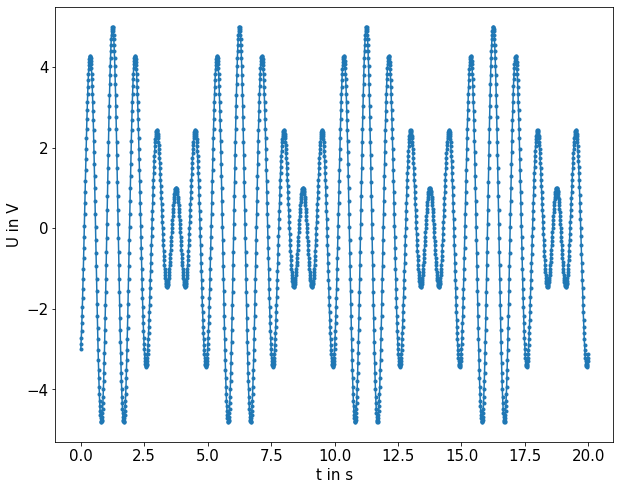

In [49]:
#Zeitsignal ausgeben
tstep = 0.01
N = 2000
f0 = 1

t = np.arange(0,(N-1)*tstep, tstep) #time Step
y = 2*np.sin(2*np.pi*f0*t)-3*np.cos(2*np.pi*1.2*t)

plt.plot(t,y, ".-")
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.show()

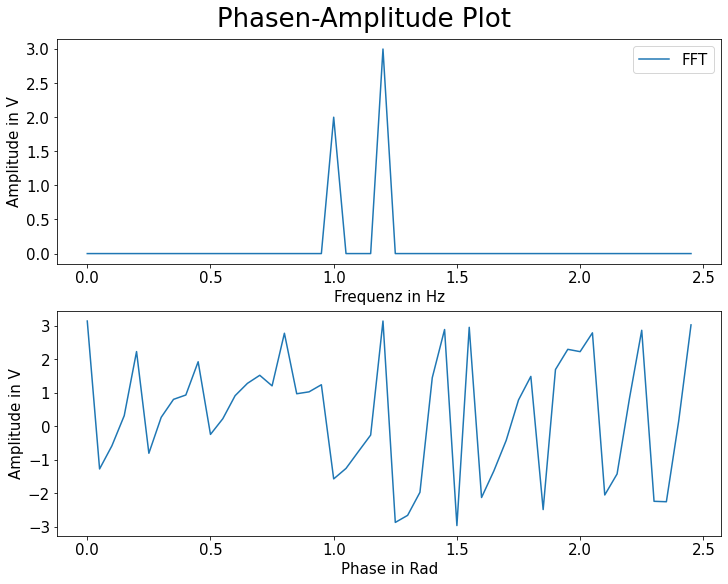

In [50]:
freq, X_mag, X_phase = getPhaseAngleFFT(t,y)
plotPA(freq, X_mag, X_phase,50)

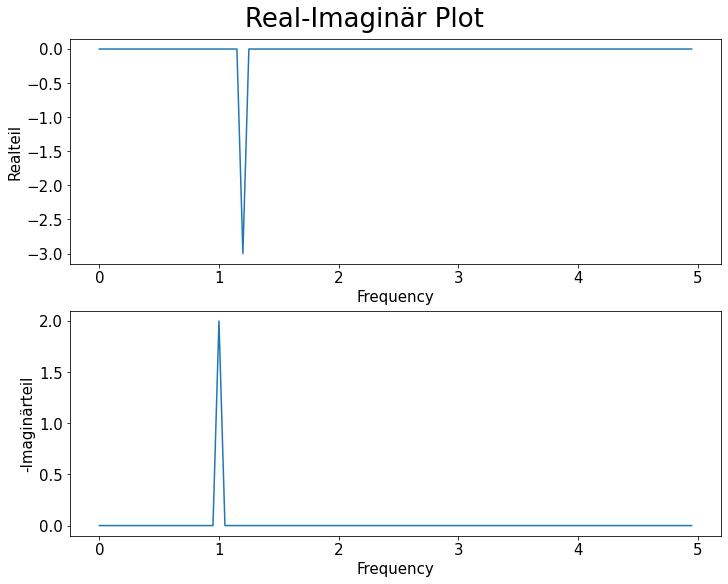

In [51]:
#Real-Imag
f_plot, X_real, X_imag = getRealImFFT(t,y)
plotRI(freq, X_real, X_imag, 100)

<h3>Cosinuskurve</h3>

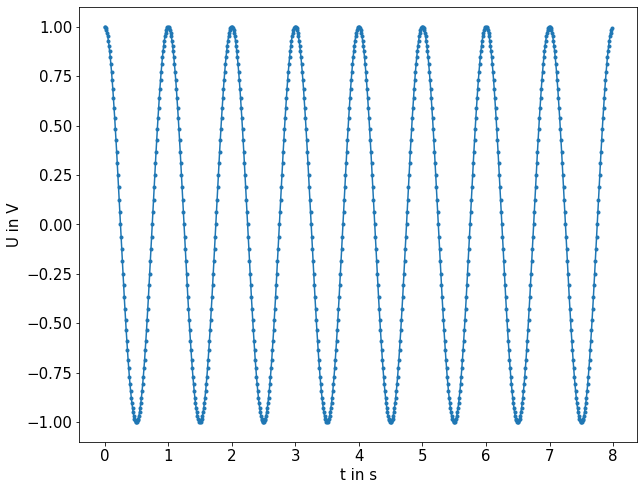

In [52]:
tstep = 0.01
N = 800
f0 = 1

t = np.arange(0,(N-1)*tstep, tstep) #time Step
y = np.cos(2*np.pi*f0*t)

plt.plot(t,y, ".-")
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.show()

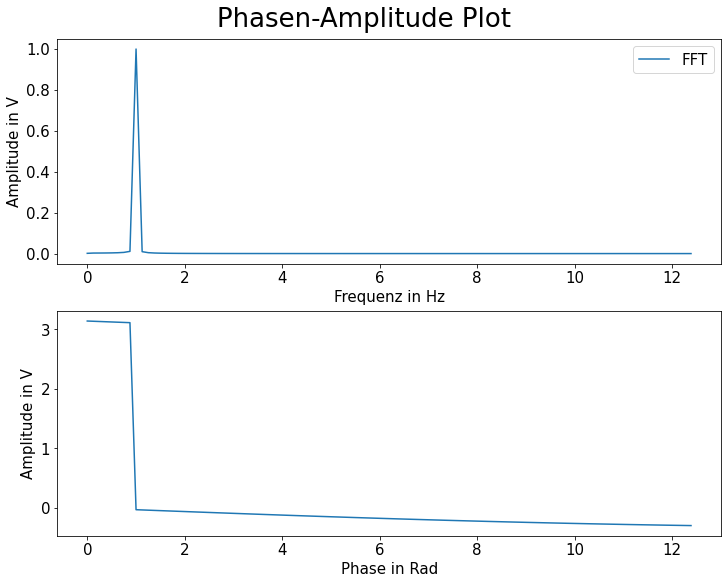

In [53]:
freq, X_mag, X_phase = getPhaseAngleFFT(t,y)
plotPA(freq, X_mag, X_phase,100)

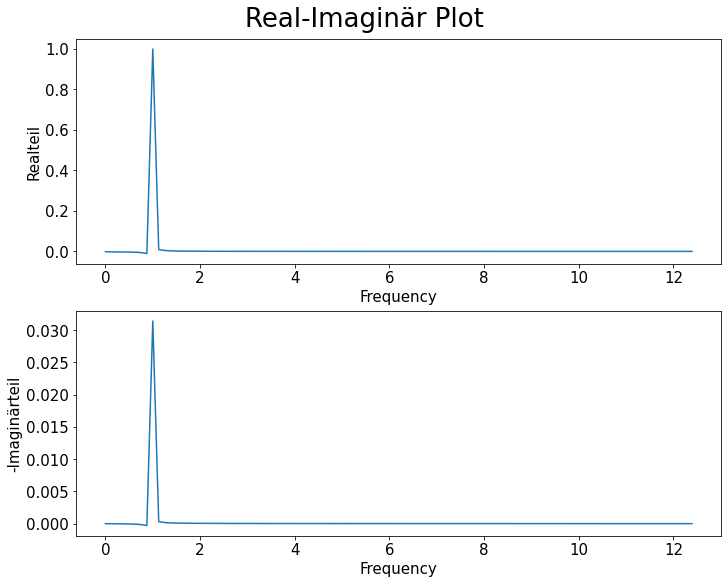

In [54]:
f_plot, X_real, X_imag = getRealImFFT(t,y)
plotRI(freq, X_real, X_imag, 100)

<h3>Dreieckschwingung</h3>

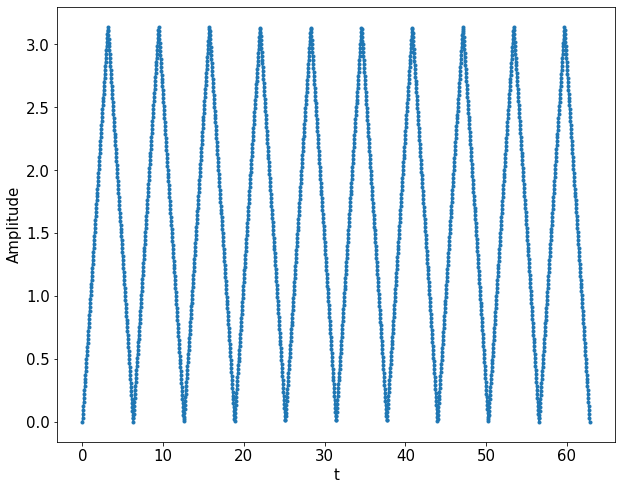

In [55]:
#Zeitsignal ausgeben
def dFunc(t):
    while t>2*np.pi:
        t = t-2*np.pi
    return np.pi-np.abs(t-np.pi)

dvFunk = np.vectorize(dFunc)


t2 = np.linspace(0, 20*np.pi, 2000)
y2 = dvFunk(t2)

plt.plot(t2, y2, ".-")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

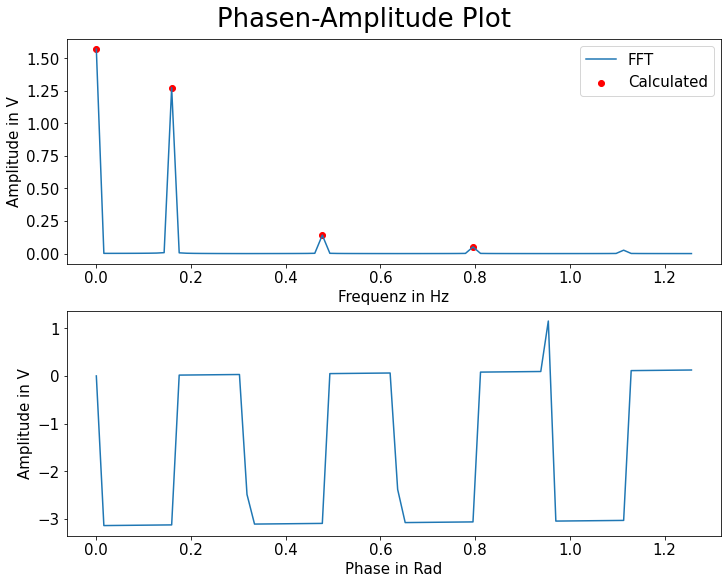

In [56]:
#Phase-Amplitude
freq2, X_mag2, X_phase2 = getPhaseAngleFFT(t2,y2)
freq_theo = [0,0.16,0.477,0.796]
amp_theo = [np.pi/2, 1.27,0.141,0.051]
plotPA(freq2, X_mag2, X_phase2,80, xData=freq_theo, yData=amp_theo)

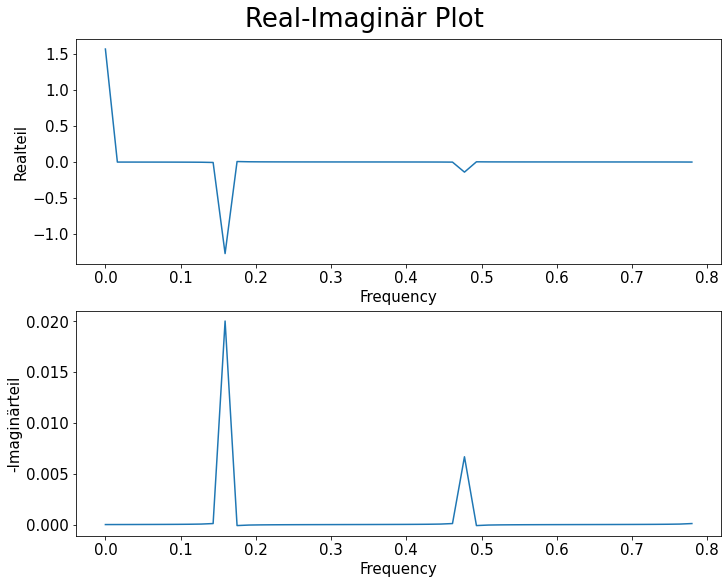

In [57]:
#Real-Imaginär
freq2, X_real2, X_imag2 = getRealImFFT(t2,y2)

plotRI(freq2, X_real2, X_imag2,50)

<h3>Rechteckspannung</h3>

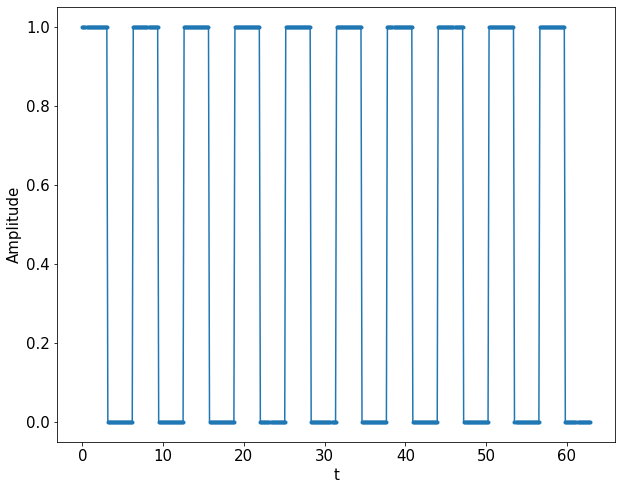

In [58]:
#Zeitsignal ausgeben
def rFunc(t):
    while t>2*np.pi:
        t = t-2*np.pi
    if t>np.pi:
        return 0
    else:
        return 1

drFunk = np.vectorize(rFunc)


t3 = np.linspace(0, 20*np.pi, 500)
y3 = drFunk(t3)

plt.plot(t3, y3, ".-")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

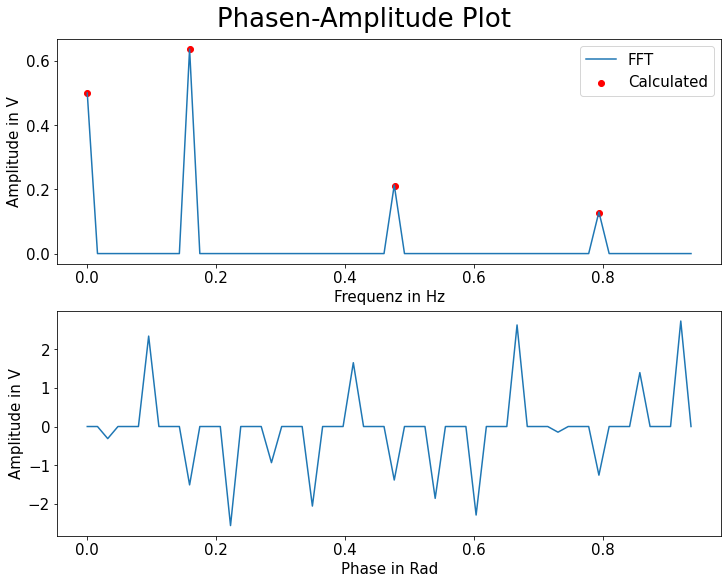

In [59]:
#Phase-Amplitude
freq3, X_mag3, X_phase3 = getPhaseAngleFFT(t3,y3)
freq_theo3 = [0,0.159,0.477,0.795]
amp_theo3 = [0.5, 0.6366,0.212,0.127]
plotPA(freq3, X_mag3, X_phase3,60, xData=freq_theo3, yData=amp_theo3)



<h2> Aufgabe 1 </h2>

<p>Messen Sie den Zeitverlauf einer Dreieck- und einer Rechteckspannung mit dem USB-Oszilloskop
unter Verwendung des internen Funktionsgenerators. Analysieren Sie den Zeitverlauf mittels Fouriertransformation. Vergleichen Sie die experimentellen mit den analytisch berechneten Ergebnissen.
Untersuchen Sie den Alias-Effekt (siehe Nyquist-Shannonsches Abtasttheorem), indem Sie bei vorgegebener Grenzfrequenz fG der FFT die Frequenz f einer Sinusschwingung von f < fG zu f > fG
durchstimmen und jeweils das Fourierspektrum betrachten. Erklaren Sie die Beobachtungen.</p>

<h3>Dreieckspannung</h3>

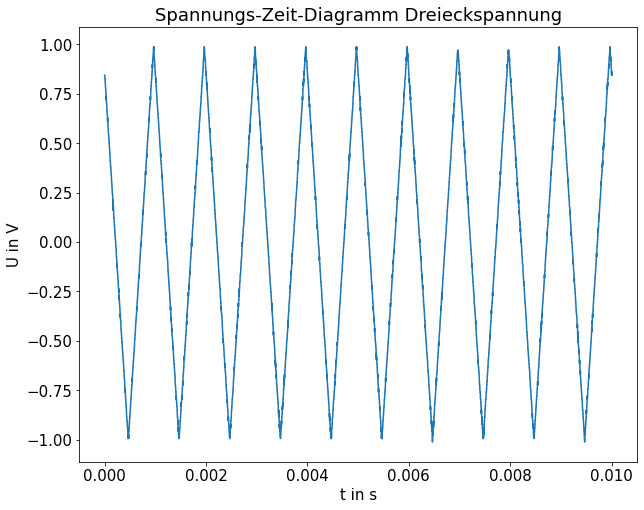

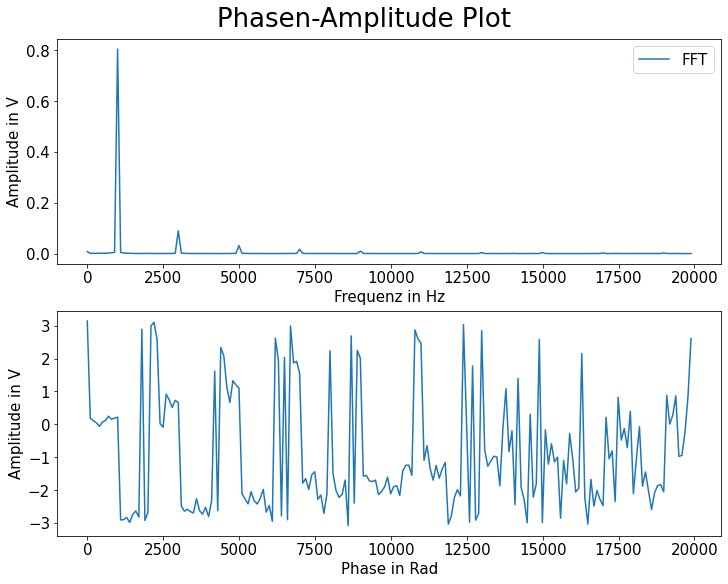

In [60]:
DF = pd.DataFrame
DF = pd.read_csv(filepath_or_buffer="./A1/2.csv", delimiter=";", decimal=",")
A1_t = DF["t"]*10**-3
A1_v = DF["v"]


plt.plot(A1_t, A1_v)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm Dreieckspannung")

A1_freq1, A1_X_mag1, A1_X_phase1 = getPhaseAngleFFT(A1_t, A1_v)
plotPA(A1_freq1, A1_X_mag1, A1_X_phase1,200,)

<h3>Rechteckspannung</h3>

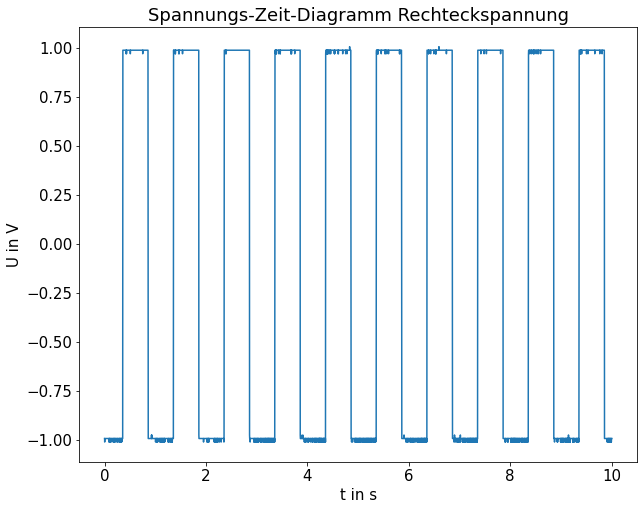

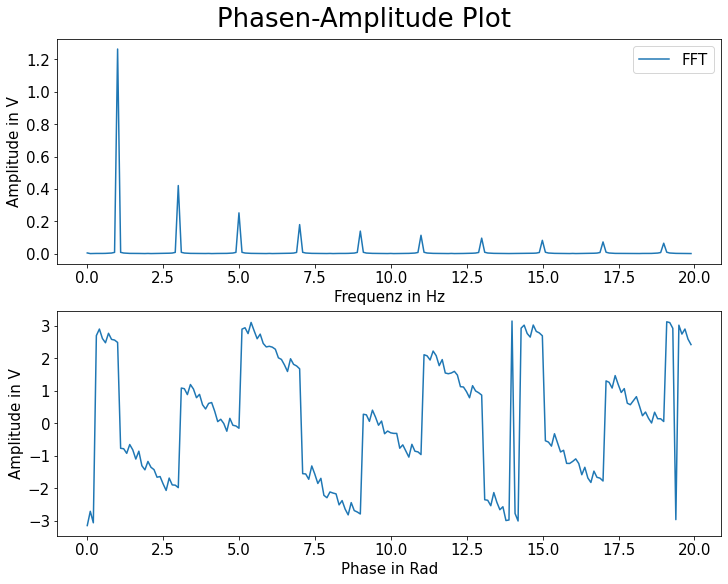

In [61]:
DF = pd.read_csv(filepath_or_buffer="./A1/1.csv", delimiter=";", decimal=",")
A1_t2 = DF["t"]
A1_v2 = DF["v"]

freq_theo3 = [0,0.159,0.477,0.795]
amp_theo3 = [0.5, 0.6366,0.212,0.127]

plt.plot(A1_t2, A1_v2)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm Rechteckspannung")

A1_freq2, A1_X_mag2, A1_X_phase2 = getPhaseAngleFFT(A1_t2, A1_v2)
plotPA(A1_freq2, A1_X_mag2, A1_X_phase2,200)

<h3>Nyquist-Shannonsches Abtasttheorem</h3>

Text(0.5, 1.0, 'Spannungs-Zeit-Diagramm $f>f_g$')

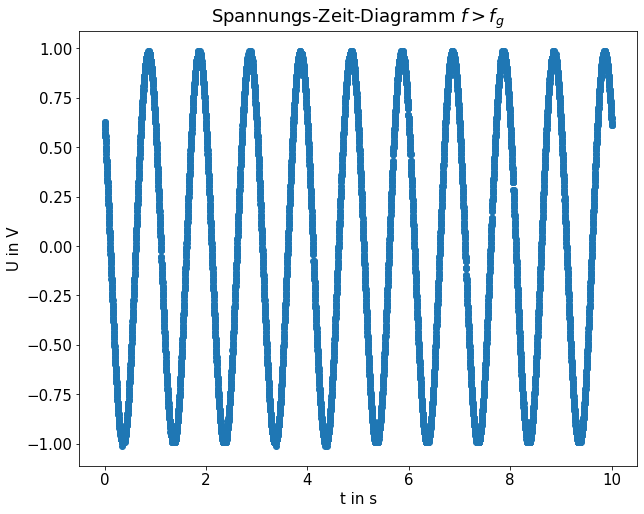

In [62]:
DF = pd.read_csv(filepath_or_buffer="./A1/3.csv", delimiter=";", decimal=",")
A1_t3 = DF["t"]
A1_v3 = DF["v"]

plt.scatter(A1_t3, A1_v3)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm $f>f_g$")

In [63]:
#Todo
DF = pd.read_csv(filepath_or_buffer="./A1/4.csv", delimiter=";", decimal=",")
A1_t4 = DF["t"]
A1_v4 = DF["v"]

plt.scatter(A1_t4, A1_v4)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm $f=f_g$")

In [64]:
#Todo
DF = pd.read_csv(filepath_or_buffer="./A1/5.csv", delimiter=";", decimal=",")
A1_t5 = DF["t"]
A1_v5 = DF["v"]

plt.scatter(A1_t5, A1_v5)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm $f<f_g$")

<h2>Aufgabe 2</h2>

<p>“Tiefpunkt-Schaltung”. Messen Sie fur zwei kapazitiv gekoppelte Schwingkreise und zehn verschiedene Kopplungskondensatoren mit Hilfe von Abklingvorgangen die Schwebungsschwingungen in der “Tiefpunktschaltung”. Stellen Sie fur jede Schaltung die zehn Frequenzspektren in einer Abbildung dar. Bestimmen Sie aus den Fourier-Transformierten die Frequenzen der gleich- sowie der gegensinnigen Schwingung. Ermitteln Sie die jeweiligen Kopplungsgrade. Bestimmen Sie aus dem Fit der theoretischen Beziehung fur die Kopplungsgrade an die Daten die Kapazit C.</p>

<h3>Vorexperiment</h3>

<h4>Schaltung 1</h4>

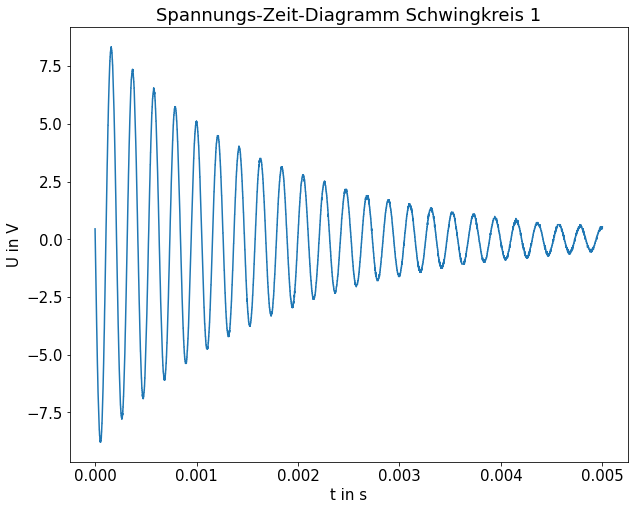

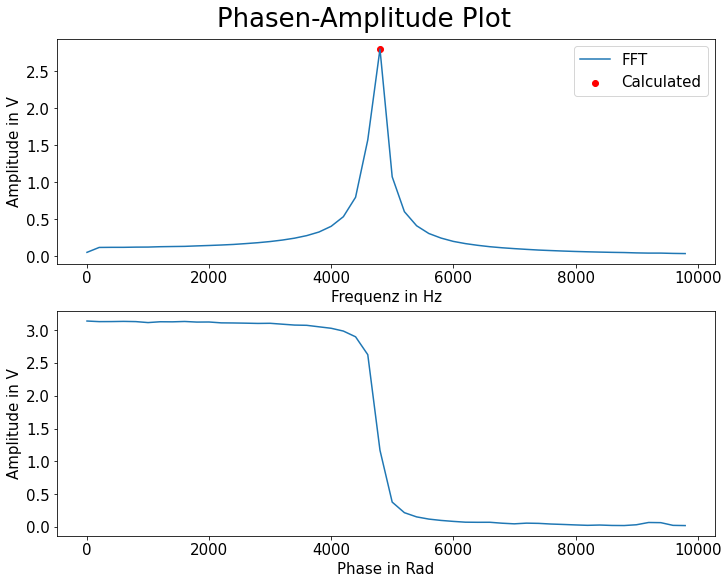

f = 4797.0Hz


In [65]:
DF = pd.read_csv("./A2/v1.csv", delimiter=";", decimal=",")

A2v_t1 = DF["t"].to_numpy()*10**-3
A2v_v1 = DF["v"].to_numpy()

plt.plot(A2v_t1, A2v_v1)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm Schwingkreis 1")

A2v_freq1, A2v_X_mag1, A2v_X_phase1 = getPhaseAngleFFT(A2v_t1, A2v_v1)

A2v_i1 = getMax(A2v_X_mag1, 1)


plotPA(A2v_freq1, A2v_X_mag1, A2v_X_phase1, 50,xData=A2v_freq1[A2v_i1],yData=A2v_X_mag1[A2v_i1])
print(f"f = {np.round(A2v_freq1[A2v_i1][0])}Hz")

<h4>Schaltung 2</h4>

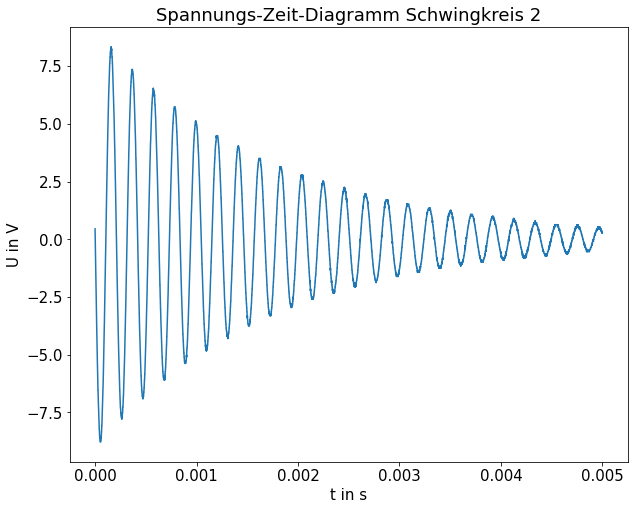

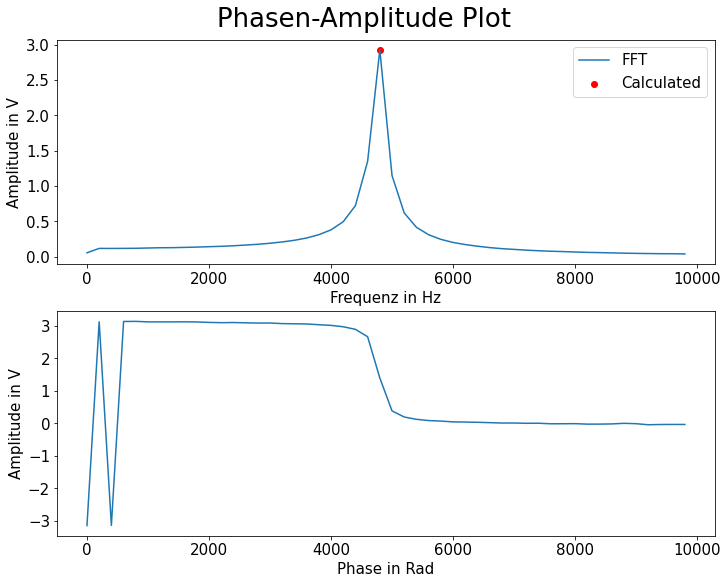

f = 4797.0Hz


In [66]:
DF = pd.read_csv("./A2/v2.csv", delimiter=";", decimal=",")

A2v_t2 = DF["t"].to_numpy()*10**-3
A2v_v2 = DF["v"]

plt.plot(A2v_t2, A2v_v2)
plt.xlabel("t in s")
plt.ylabel("U in V")
plt.title("Spannungs-Zeit-Diagramm Schwingkreis 2")

A2v_freq2, A2v_X_mag2, A2v_X_phase2 = getPhaseAngleFFT(A2v_t2, A2v_v2)

A2v_i2 = getMax(A2v_X_mag2,1)

plotPA(A2v_freq2, A2v_X_mag2, A2v_X_phase2, 50,xData=A2v_freq2[A2v_i2],yData=A2v_X_mag2[A2v_i2])
print(f"f = {np.round(A2v_freq2[A2v_i2][0])}Hz")

<h3>Experiment</h3>

In [67]:
o=8
#Daten einlesen
A2_t = []
A2_v = []
for i in range(o):
    DF = pd.read_csv(f"./A2/{i+1}.csv", delimiter=";", decimal=",")
    A2_t.append(DF["t"].to_numpy()*10**-3)
    A2_v.append(DF["v"].to_numpy())

In [68]:
#Daten aufbereiten
A2_freq = []
A2_X_mag = []
A2_EFr = []
A2_EFl = []
A2_Ar = []
A2_Al = []

for i in range(o):
    f, mag, phase = getPhaseAngleFFT(A2_t[i], A2_v[i])
    A2_freq.append(f)
    A2_X_mag.append(mag)
    i = getMax(mag, 2)

    f1 = f[i[0]]
    a1 = mag[i[0]]

    f2 = f[i[1]]
    a2 = mag[i[1]]
    if f1 > f2:
        A2_EFr.append(f1)
        A2_Ar.append(a1)

        A2_EFl.append(f2)
        A2_Al.append(a2)
    else:
        A2_EFr.append(f2)
        A2_Ar.append(a2)

        A2_EFl.append(f1)
        A2_Al.append(a1)

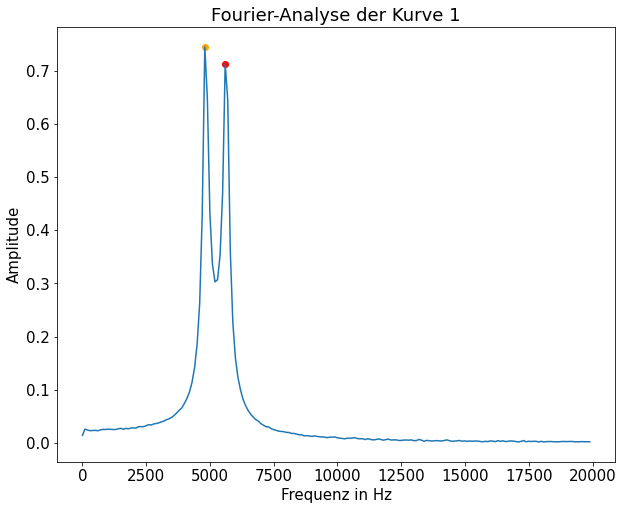

In [69]:
i = 0
plt.plot(A2_freq[i][0:200], A2_X_mag[i][0:200])
plt.scatter(A2_EFr[i], A2_Ar[i], color="red", label="rechte Eigenfrequenzen")
plt.scatter(A2_EFl[i], A2_Al[i], color="orange", label="linke Eigenfrequenzen")
plt.title(f"Fourier-Analyse der Kurve {i+1}")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude")
plt.show()

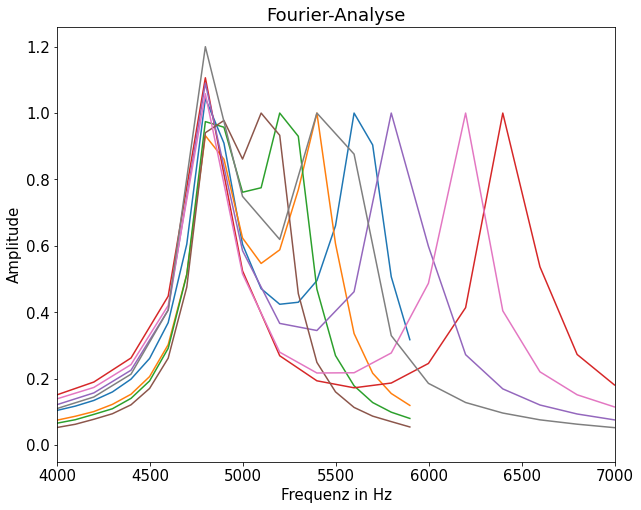

In [70]:
#Daten ausgeben
for i in range(o):
    plt.plot(A2_freq[i][20:60], A2_X_mag[i][20:60]/A2_Ar[i])
plt.title("Fourier-Analyse")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude")
plt.xlim(4000,7000)
plt.show()

In [71]:
#Kopplungskonstante berechnen
A2_k = []
for i in range(o):
    k_i = np.abs(((2*np.pi*A2_EFl[i])**2-(2*np.pi*A2_EFr[i])**2)/((2*np.pi*A2_EFl[i])**2+(2*np.pi*A2_EFr[i])**2))
    A2_k.append(k_i)

A2_Ck = np.array([10**5,10**5+4*10**4,10**5+8*10**4,5*10**4,8*10**4,2*10**5+2*10**4,6*10**4,10**5+2*10**4])*10**-12

C = 18.0nF


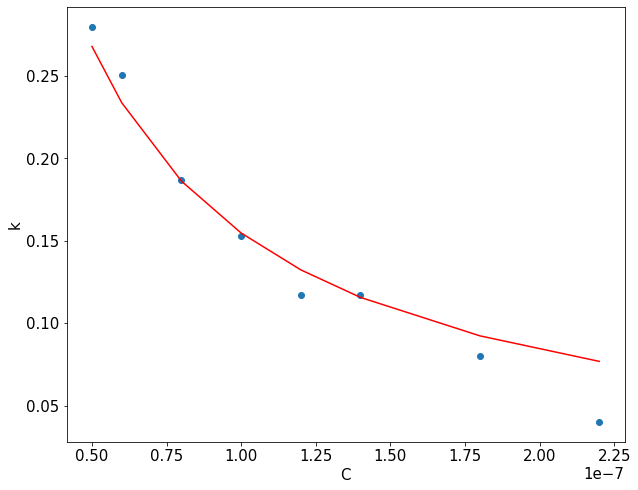

In [72]:
#Fit an Theoriekurve
def function(x,C):
    return (C/(C+x))

b1, cov1 = curve_fit(function, A2_Ck, A2_k)
plt.scatter(A2_Ck, A2_k)
plt.plot(np.sort(A2_Ck), function(np.sort(A2_Ck), b1[0]), label="Fit", color="red")
plt.xlabel("C")
plt.ylabel("k")
print(f"C = {np.round(b1[0]*10**9)}nF")

<h2>Aufgabe 3</h2>

<p>a) “Hochpunkt-Schaltung”. Messen Sie fur zwei kapazitiv gekoppelte Schwingkreise und zehn ¨
verschiedene Kopplungskondensatoren mit Hilfe von Abklingvorgangen die Schwebungs- ¨
schwingungen in der “Hochpunktschaltung”. Stellen Sie fur jede Schaltung die zehn Fre- ¨
quenzspektren in einer Abbildung dar. Bestimmen Sie aus den Fourier-Transformierten die
Frequenzen der gleich- sowie der gegensinnigen Schwingung. Ermitteln Sie die jeweiligen
Kopplungsgrade. Bestimmen Sie aus dem Fit der theoretischen Beziehung fur die Kopplungs- ¨
grade an die Daten die Kapazitat ¨ C.
(b) Messen Sie die Schwebungsdauer fur einen ausgew ¨ ahlten Wert des Kopplungskondensators. ¨
Vergleichen Sie mit dem aus den Frequenzen der gleich- und gegensinnigen Schwingung
berechneten Wert.</p>

<h3>Gleichsinnig</h3>

In [73]:
#Daten gleichsinnig einlesen
o = 10

t_gleich = []
v_gleich = []
for i in range(o):
    DF = pd.read_csv(f"./A3/gleich/{i+1}.csv", delimiter=";", decimal=",")
    t_gleich.append(DF["t"].to_numpy()*10**-3)
    v_gleich.append(DF["v"].to_numpy())

In [74]:
#Daten gleichsinnig aufbereiten
freq_gleich = []
X_mag_gleich = []
Ef_gleich = []
A_gleich = []

for i in range(o):
    f, mag, phase = getPhaseAngleFFT(t_gleich[i], v_gleich[i])
    freq_gleich.append(f)
    X_mag_gleich.append(mag)
    i = getMax(mag, 1)

    f = f[i[0]]
    a = mag[i[0]]

    Ef_gleich.append(f)
    A_gleich.append(a)

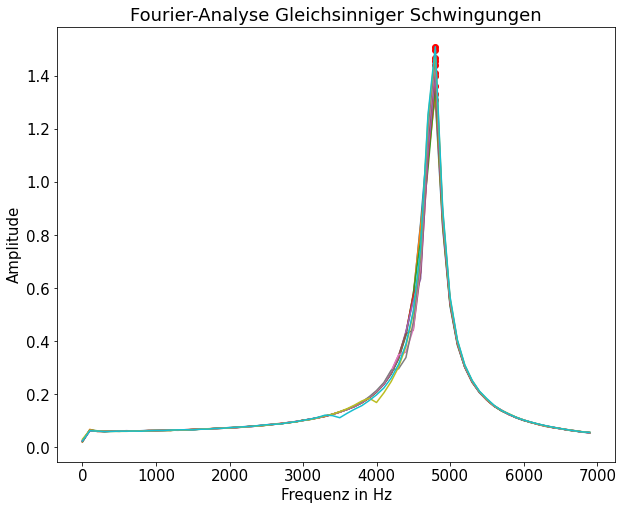

In [75]:
#Daten ausgeben
for i in range(o):
    plt.plot(freq_gleich[i][0:70], X_mag_gleich[i][0:70])
plt.scatter(Ef_gleich, A_gleich, color="red", label="Eigenfrequenzen")
plt.title("Fourier-Analyse Gleichsinniger Schwingungen")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude")
plt.show()

<h3>Gegensinnig</h3>

In [76]:
#Daten gegensinnig einlesen
o = 10

t_gegen = []
v_gegen = []
for i in range(o):
    DF = pd.read_csv(f"./A3/gegen/{i+1}.csv", delimiter=";", decimal=",")
    t_gegen.append(DF["t"].to_numpy()*10**-3)
    v_gegen.append(DF["v"].to_numpy())

In [77]:
#Daten gegensinnig aufbereiten
freq_gegen = []
X_mag_gegen = []
Ef_gegen = []
A_gegen = []

for i in range(o):
    f, mag, phase = getPhaseAngleFFT(t_gegen[i], v_gegen[i])
    freq_gegen.append(f)
    X_mag_gegen.append(mag)
    i = getMax(mag, 1)

    f = f[i[0]]
    a = mag[i[0]]

    Ef_gegen.append(f)
    A_gegen.append(a)

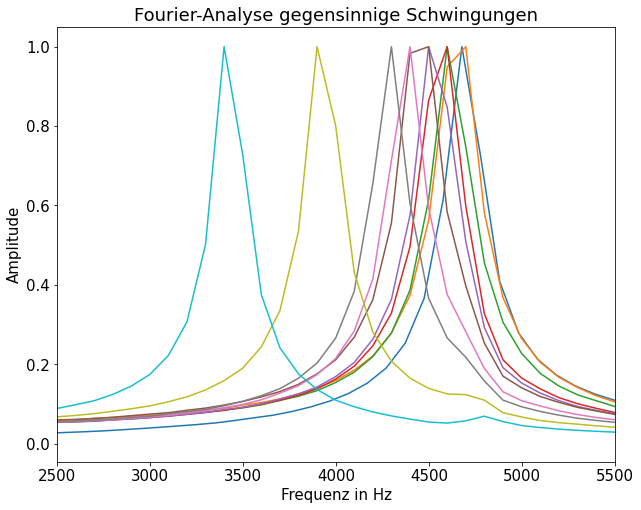

In [78]:
#Daten ausgeben
for i in range(o):
    plt.plot(freq_gegen[i][0:60], X_mag_gegen[i][0:60]/A_gegen[i])
plt.title("Fourier-Analyse gegensinnige Schwingungen")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude")
plt.xlim(2500,5500)
plt.show()

<h3>Konstanten berechnen</h3>

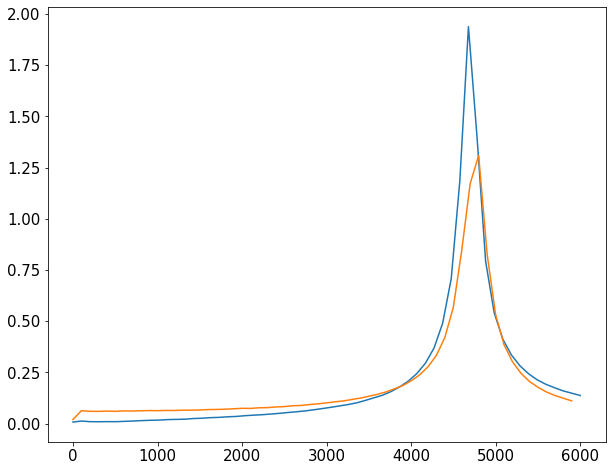

In [79]:
i=0
plt.plot(freq_gegen[i][0:60], X_mag_gegen[i][0:60])
plt.plot(freq_gleich[i][0:60], X_mag_gleich[i][0:60])

In [80]:
#Kopplungskonstante berechnen
A3_k = []
for i in range(o):
    k_i = np.abs(((2 * np.pi * Ef_gegen[i])**2 - (2 * np.pi * Ef_gleich[i])** 2) / (
                (2 * np.pi * Ef_gegen[i])**2 + (2 * np.pi * Ef_gleich[i])** 2))
    A3_k.append(k_i)

A3_Ck = np.array([300, 400, 600, 900, 1100, 1500, 1900, 2500, 5000, 10000])*10**-12

C = 18.0F


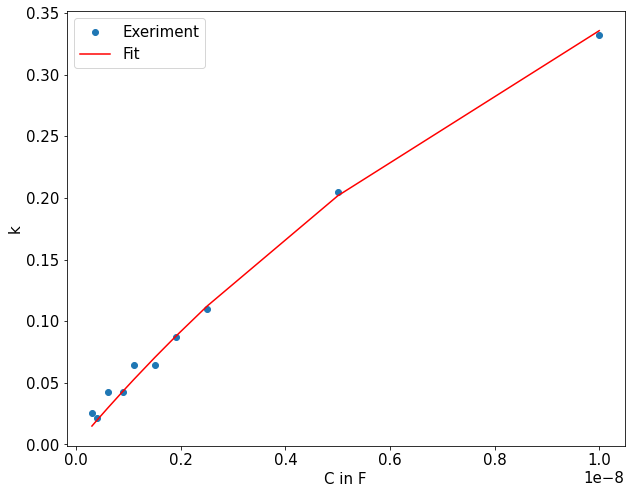

In [81]:
#Fit an Theoriekurve
def function(x,C):
    return (x/(x+C))

b2, cov2 = curve_fit(function, A3_Ck, A3_k, p0=18*10**-9)
plt.scatter(A3_Ck, A3_k, label="Exeriment")
plt.plot(A3_Ck, function(A3_Ck, b2[0]), label="Fit", color="red")
plt.xlabel("C in F")
plt.ylabel("k")
plt.legend()
print(f"C = {np.round(b1[0]*10**9)}F")

<h3>Schwebungsschwingung</h3>

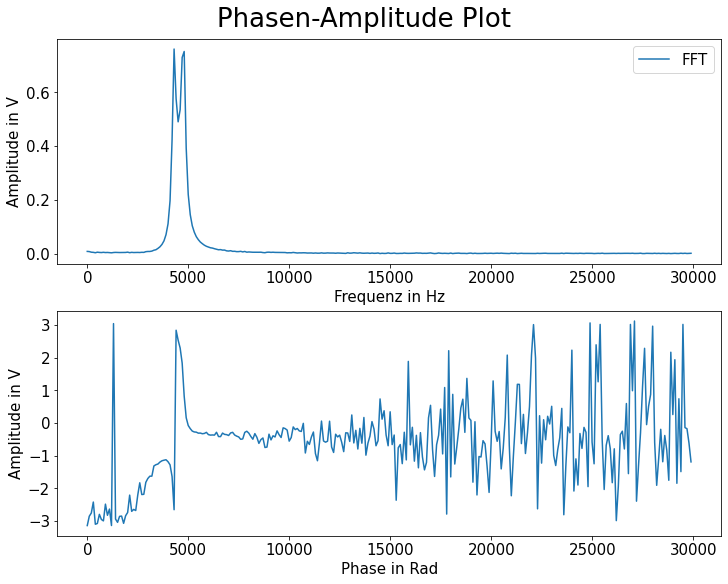

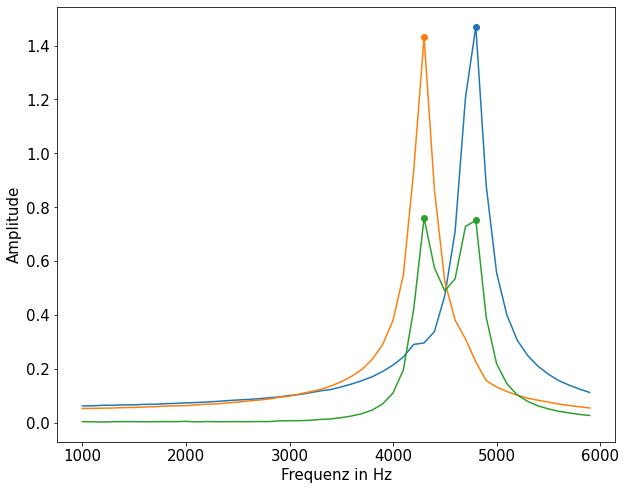

In [82]:
DF = pd.read_csv("./A3/schweb.csv", delimiter=";", decimal=",")

t_schweb = DF["t"].to_numpy()*10**-3
v_schweb = DF["v"].to_numpy()

freq_schweb, X_mag_schweb, X_phase_schweb = getPhaseAngleFFT(t_schweb, v_schweb)

i_schweb = getMax(X_mag_schweb, 2, 1)


f1_schweb = freq_schweb[i_schweb[0]]
f2_schweb = freq_schweb[i_schweb[1]]

a1_schweb = X_mag_schweb[i_schweb[0]]
a2_schweb = X_mag_schweb[i_schweb[1]]

plotPA(freq_schweb, X_mag_schweb, X_phase_schweb, 300)

i =7
le=10
re=60
plt.plot(freq_gleich[i][le:re], X_mag_gleich[i][le:re], label="gleichsinnig")
plt.plot(freq_gegen[i][le:re], X_mag_gegen[i][le:re], label = "gegensinnig")
plt.plot(freq_schweb[le:re], X_mag_schweb[le:re], label="Schwebung")
plt.scatter(Ef_gleich[i], A_gleich[i])
plt.scatter(Ef_gegen[i], A_gegen[i])
plt.scatter([f1_schweb, f2_schweb],[a1_schweb, a2_schweb])

plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude")
plt.show()

gemessene Frequenz: 0.0020299999999999997
berechnete Frequenz: 0.002001152000000007


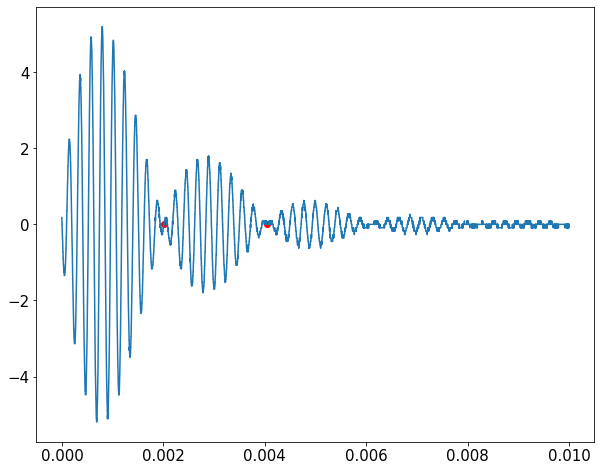

In [83]:
plt.plot(t_schweb, v_schweb)
plt.scatter([0.00202,0.00405], [0,0],color="red")
print(f"gemessene Frequenz: {0.00405-0.00202}")

print(f"berechnete Frequenz: {1/(Ef_gleich[i]-Ef_gegen[i])}")

<h2>Aufgabe 4</h2>

<h4>ungekoppelter Schwingkreis</h4>

Eigenfrequenz f = 7396.0Hz


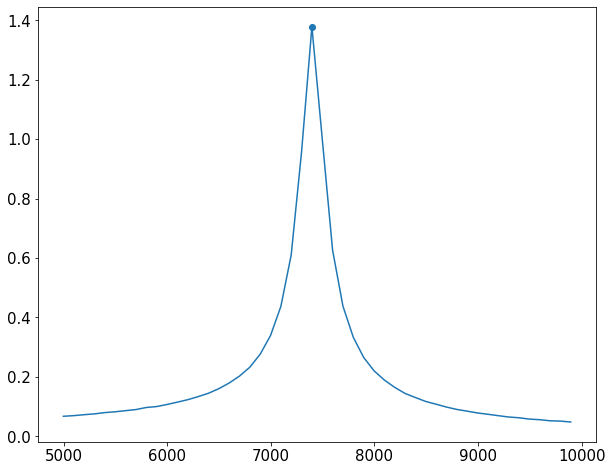

In [84]:
DF = pd.read_csv(f"./A4/0.csv", delimiter=";", decimal=",")
t4 = DF["t"].to_numpy()*10**-3
v4 = DF["v"].to_numpy()

freq4, X_mag4, X_phase4 = getPhaseAngleFFT(t4,v4)
i4 = getMax(X_mag4, 1)

plt.plot(freq4[50:100], X_mag4[50:100])
plt.scatter(freq4[i4], X_mag4[i4], label="Eigenfrequenz")

EF4 = freq4[i4][0]
print(f"Eigenfrequenz f = {np.round(EF4)}Hz")


<h4>gekoppelter Schwingkreis</h4>

In [85]:
o=7
#Daten einlesen
A4_t = []
A4_v = []
for i in range(o):
    DF = pd.read_csv(f"./A4/{i+1}.csv", delimiter=";", decimal=",")
    A4_t.append(DF["t"].to_numpy()*10**-3)
    A4_v.append(DF["v"].to_numpy())

In [86]:
A4_freq = []
A4_X_mag = []
A4_EFr = []
A4_EFl = []
A4_Ar = []
A4_Al = []

for i in range(o):
    f, mag, phase = getPhaseAngleFFT(A4_t[i], A4_v[i])
    A4_freq.append(f)
    A4_X_mag.append(mag)
    i = getMax(mag, 2, 4)

    f1 = f[i[0]]
    a1 = mag[i[0]]

    f2 = f[i[1]]
    a2 = mag[i[1]]
    if f1 > f2:
        A4_EFr.append(f1)
        A4_Ar.append(a1)

        A4_EFl.append(f2)
        A4_Al.append(a2)
    else:
        A4_EFr.append(f2)
        A4_Ar.append(a2)

        A4_EFl.append(f1)
        A4_Al.append(a1)

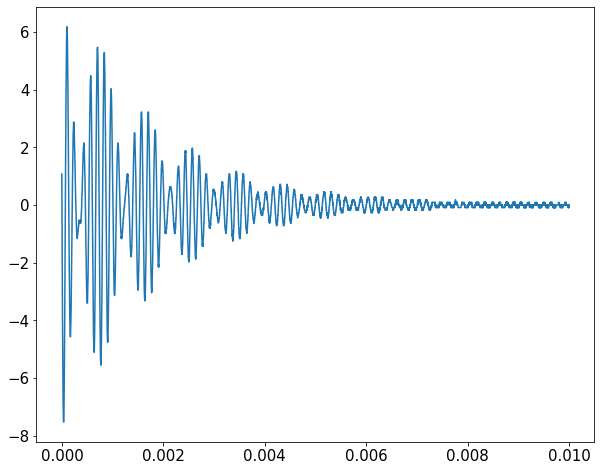

In [87]:
plt.plot(A4_t[3],A4_v[3])

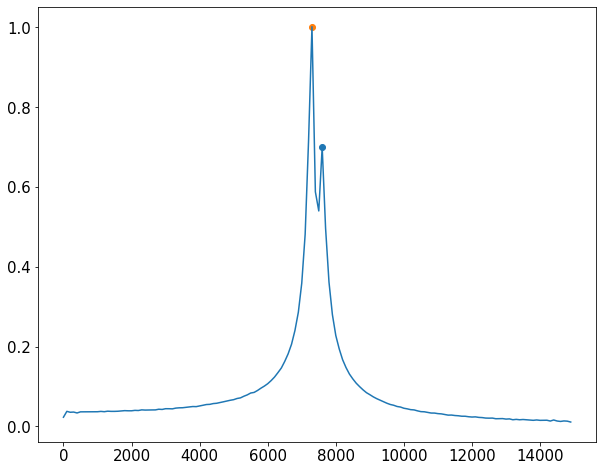

In [88]:
i = 5
plt.plot(A4_freq[i][:150], A4_X_mag[i][:150])
plt.scatter(A4_EFr[i],A4_Ar[i])
plt.scatter(A4_EFl[i],A4_Al[i])
plt.show()

In [89]:
#Kopplungskonstanten w+
A4_d = [0.05,0.1,0.15,0.08, 0.13,0.17,0.035]#

A4_k1 = []
A4_k2 = []
for i in range(o):
    k_1 = (2*np.pi*EF4)**2/(2*np.pi*A4_EFl[i])**2-1 #w+
    A4_k1.append(k_1)
    k_2 = -(2*np.pi*EF4)**2/(2*np.pi*A4_EFr[i])**2+1 #w-
    A4_k2.append(k_2)

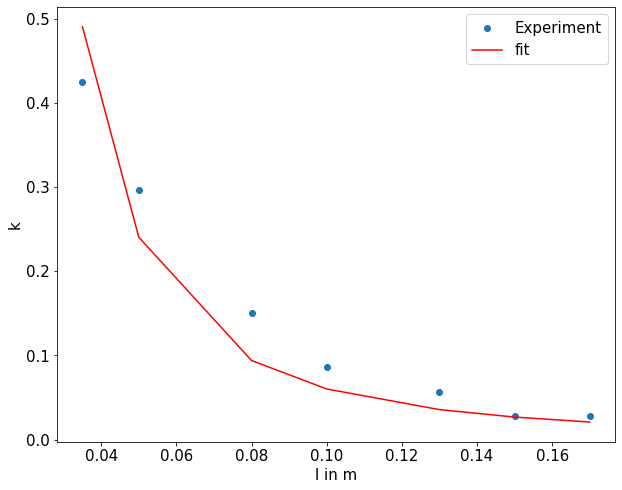

In [90]:
def function2(x,a):
    return a/x**2

plt.scatter(A4_d, A4_k1, label="Experiment")
b4, cov4 = curve_fit(function2,np.array(A4_d),np.array(A4_k2))
plt.plot(np.sort(np.array(A4_d)), function2(np.sort(np.array(A4_d)),b4[0]), color="red", label="fit")
plt.legend()
plt.xlabel("l in m")
plt.ylabel("k")
plt.show()

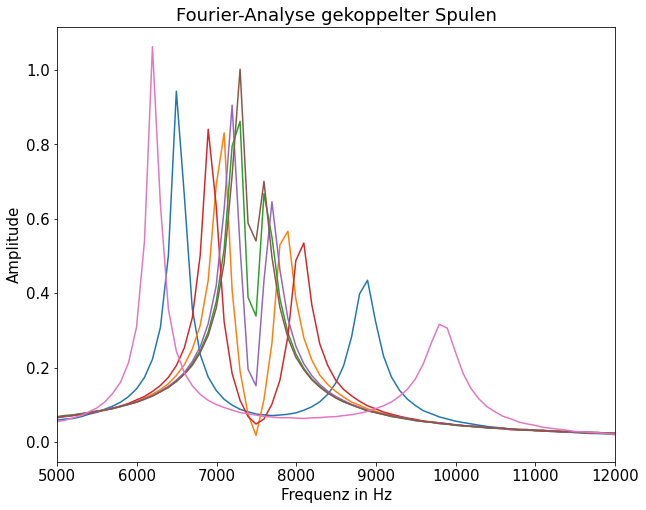

In [91]:
#Daten ausgeben
for i in range(o):
    plt.plot(A4_freq[i], A4_X_mag[i])
plt.title("Fourier-Analyse gekoppelter Spulen")
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude")
plt.xlim(5000,12000)
plt.show()

In [92]:
#Berechnung von L
L=1/(4*np.pi**2*EF4**2*18*10**-9)
print(L)

0.0257279084646718


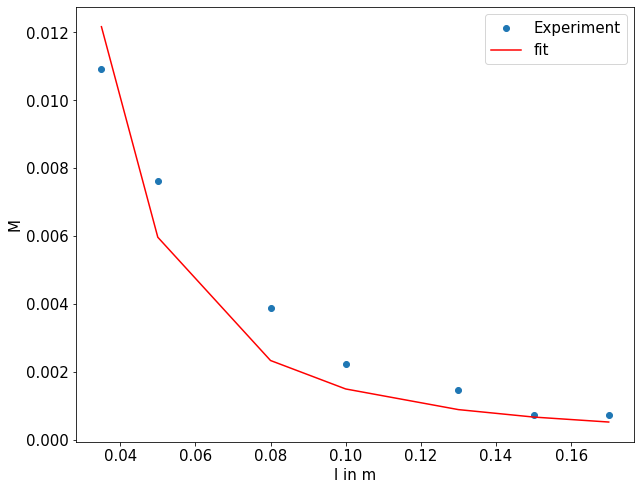

In [93]:
M = L*np.array(A4_k1)
plt.scatter(A4_d, M, label="Experiment")
b5, cov5 = curve_fit(function2,np.array(A4_d),np.array(M))
plt.plot(np.sort(np.array(A4_d)), function2(np.sort(np.array(A4_d)),b5[0]), color="red", label="fit")
plt.legend()
plt.xlabel("l in m")
plt.ylabel("M")
plt.show()